No handles with labels found to put in legend.


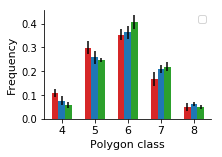

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_c = pd.read_excel('input_data/global_neighbohood.xlsx',sheet_name='control_g')
data_c = df_c.values
mean_data_c = np.mean(data_c, axis=0)
std_data_c = np.std(data_c, axis=0)
df_r = pd.read_excel('input_data/global_neighbohood.xlsx',sheet_name='rnai_g')
data_r = df_r.values
mean_data_r = np.mean(data_r, axis=0)
std_data_r = np.std(data_r, axis=0)
df_o = pd.read_excel('input_data/global_neighbohood.xlsx',sheet_name='oe_g')
data_o = df_o.values
mean_data_o = np.mean(data_o, axis=0)
std_data_o = np.std(data_o, axis=0)
ind = np.arange(len(mean_data_c))
width = 0.2
width_bar = 0.2
fig, ax = plt.subplots(figsize=(3, 2))
rects1 = ax.bar(ind - width, mean_data_r, width_bar, yerr=std_data_r,color='tab:red')
rects2 = ax.bar(ind, mean_data_c, width_bar, yerr=std_data_c,color='tab:blue')
rects3 = ax.bar(ind + width, mean_data_o, width_bar, yerr=std_data_o,color='tab:green')
ax.set_ylabel('Frequency', fontsize=11)
ax.set_xlabel('Polygon class',fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which='minor', axis='both', linestyle=':', linewidth=0.5, color='gray')
ax.set_xticks(ind)
ax.set_xticklabels(('4', '5', '6', '7', '8'), fontsize=11)
#plt.savefig('Figure5B.svg', format='svg')
ax.legend()

In [4]:
import pandas as pd
from scipy import stats
import numpy as np

table_data = {'Comparison': [], 'Mean Difference': [], 't-statistic': [], 'p-value': [], 'Effect Size': [], '95% CI Lower': [], '95% CI Upper': []}

a = data=df_c[["n4"]].values
a = a[~np.isnan(a)].tolist()
b = data=df_r[["n4"]].values
b = b[~np.isnan(b)].tolist()
c = data=df_o[["n4"]].values
c = c[~np.isnan(c)].tolist()

comparisons = [('RNAin4-OEn4', b, c)]

for comparison, group1, group2 in comparisons:
    t_stat, p_value = stats.ttest_ind(group1, group2)
    mean_diff = round(abs(np.mean(group1) - np.mean(group2)), 2)
    effect_size = round(mean_diff / np.std(group1 + group2), 2)
    ci = stats.t.interval(0.95, len(group1) + len(group2) - 2, loc=np.mean(group1) - np.mean(group2), scale=stats.sem(group1 + group2))
    table_data['Comparison'].append(comparison)
    table_data['Mean Difference'].append(mean_diff)
    table_data['t-statistic'].append(t_stat)
    table_data['p-value'].append(p_value)
    table_data['Effect Size'].append(effect_size)
    table_data['95% CI Lower'].append(round(ci[0], 2))
    table_data['95% CI Upper'].append(round(ci[1], 2))

result_table = pd.DataFrame(table_data)
print(result_table)

    Comparison  Mean Difference  t-statistic   p-value  Effect Size  \
0  RNAin4-OEn4             0.05     4.819638  0.001322         1.77   

   95% CI Lower  95% CI Upper  
0          0.03          0.07  
